# Raw food item price analysis for June 2023

### Dataframe 1: main dataframe with the prices and dates

In [1]:
import numpy as np
import pandas as pd

#!pip install pandas fastparquet

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_2023-06.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

df.head()

,date,premise_code,item_code,price
0,2023-06-01,2,1,9.4
1,2023-06-01,2,9,36.0
2,2023-06-01,2,16,4.8
3,2023-06-01,2,18,5.5
4,2023-06-01,2,19,5.5


In [2]:
#Equate premise_code with district
#df_test = df_premise_code[['premise_code','district']] 
#df_test.head()

#premise_code = [i for i in df['premise_code']]


#premise_code

#district = [i for i,label in enumerate(df_premise_code['district']) if i]


### Dataframe 2: premise code

In [3]:
URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])

df_premise_code.head(10)

,premise_code,premise,address,premise_type,state,district
0,-1,None,",",None,None,None
1,2,PASAR BESAR IPOH,"JALAN LAKSAMANA,TAMAN JUBILEE,30300 IPOH, PERAK",Pasar Basah,Perak,Kinta
2,3,JUSCO AYER KEROH,"LOT 4991,MUKIM BUKIT BARU,75450 LEBUH AYER KER...",Pasar Raya / Supermarket,Melaka,Melaka Tengah
3,6,KEDAI RUNCIT TAFAZ MAJU PRESINT 9,"NO.5, JALAN P9B/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
4,7,KEDAI RUNCIT SYAZ MAJU PRESINT 9,"NO.5, JALAN P9E/1,PRESINT 9,62250 PUTRAJAYA",Kedai Runcit,W.P. Putrajaya,Wp Putrajaya
5,8,PASAR MINI D'MART PRESINT 8,"BLOK A T00/U01,JALAN P8/D,PRESINT 8, 62000 PUT...",Pasar Mini,W.P. Putrajaya,Wp Putrajaya
6,15,PASAR MINI KARIM,"NO, 7A,KAWASAN PASAR UTAN AJI,01000 KANGAR, PE...",Kedai Runcit,Perlis,Kangar
7,16,PASARAYA K-CERIA (KANGAR) SDN. BHD,"NO 3, 5, 7 & 9,JALAN KANGAR - ALOR SETAR SERIA...",Pasar Raya / Supermarket,Perlis,Kangar
8,115,TAMPIN SHOPPING CENTRE,"NO 111,JALAN BESAR,73000 TAMPIN, NEGERI SEMBILAN.",Pasar Raya / Supermarket,Negeri Sembilan,Tampin
9,136,THE STORE ( PUDU PLAZA ),"UG & 1st FLOOR, PUDU PLAZA,JALAN DAVIS,",Pasar Raya / Supermarket,W.P. Kuala Lumpur,Cheras


In [17]:
df_premise_code[['premis_code','state']]

KeyError: "['code'] not in index"

In [5]:
print(f'There are {df_premise_code["premise"].nunique()} premise')
df_premise_code["premise"].unique()



There are 2690 premise


array([None, 'PASAR BESAR IPOH', 'JUSCO AYER KEROH', ...,
       'BF FRESH SUPPLY SDN BHD', 'BS FRESHMART MUADZAM SHAH',
       'PASARAYA WAN MIE'], dtype=object)

In [6]:
print(f'There are {df_premise_code["premise_type"].nunique()} types of premise')
df_premise_code["premise_type"].unique()



There are 12 types of premise


array([None, 'Pasar Basah ', 'Pasar Raya / Supermarket', 'Kedai Runcit',
       'Pasar Mini', 'Restoran India Muslim', 'Restoran Cina',
       'Hypermarket', 'Restoran Melayu', 'Medan Selera', 'Foodcourt',
       'Borong', 'Kedai Serbaneka'], dtype=object)

In [7]:
print(f' There are {df_premise_code["district"].nunique()} district')
df_premise_code['district'].unique()


 There are 173 district


array([None, 'Kinta', 'Melaka Tengah', 'Wp Putrajaya', 'Kangar', 'Tampin',
       'Cheras', 'Seremban', 'Petaling Jaya', 'Tuaran',
       'Larut, Matang & Selama', 'Petaling', 'Kawasan Luar Bandar',
       'Kota Bharu', 'Kota Setar', 'Bintulu', 'Tamparuli', 'Kuala Krai',
       'Bau', 'Arau', 'Padang Besar', 'Tumpat', 'Seputeh', 'Setiawangsa',
       'Lembah Pantai', 'Gua Musang', 'Pasir Puteh', 'Bachok', 'Batu',
       'Tanah Merah', 'Pontian', 'Mersing', 'Johor Bahru', 'Kota Tinggi',
       'Gemas', 'Kawasan Bandar', 'Pasir Mas', 'Serian', 'Kuching',
       'Keningau', 'Tambunan', 'Beaufort', 'Tenom', 'Sipitang',
       'Kuala Penyu', 'Kuala Pilah', 'Bahau', 'Rompin', 'Muar',
       'Batu Pahat', 'Sri Aman', 'Kudat', 'Kuala Kangsar', 'Muallim',
       'Batang Padang', 'Segamat', 'Hulu Perak', 'Pendang', 'Pokok Sena',
       'Kerian', 'Kapit', 'Belaga', 'Song', 'Jeli', 'Alor Gajah',
       'Machang', 'Hilir Perak', 'Meradong', 'Julau', 'Sandakan',
       'Sarikei', 'Saratok', 'Kota Be

In [8]:
df_premise_code[df_premise_code['district']=='Kangar'].nunique()

premise_code    27
premise         27
address         27
premise_type    10
state            1
district         1
dtype: int64

### Dataframe 3: item code

In [9]:
URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])
df_item_code.head()

,item_code,item,unit,item_group,item_category
0,-1,None,None,None,None
1,1,AYAM BERSIH - STANDARD,1kg,BARANGAN SEGAR,AYAM
2,2,AYAM BERSIH - SUPER,1kg,BARANGAN SEGAR,AYAM
3,3,AYAM HIDUP,1kg,BARANGAN SEGAR,AYAM
4,9,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,BARANGAN SEGAR,DAGING


In [10]:
df_item_code.info

<bound method DataFrame.info of      item_code                                               item      unit  \
0           -1                                               None      None   
1            1                             AYAM BERSIH - STANDARD       1kg   
2            2                                AYAM BERSIH - SUPER       1kg   
3            3                                         AYAM HIDUP       1kg   
4            9  DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...       1kg   
..         ...                                                ...       ...   
752       2016                         SABUN SERBUK FAB (PERFECT)      680g   
753       2017                   DYNAMO POWER GEL (PERFECT CLEAN)     2.6kg   
754       2018                     SABUN PENCUCI SUNLIGHT (LEMON)     900ml   
755       2019      NESCAFE 3 IN 1 ORIGINAL (AROMATIC & BALANCED)  25 x 18g   
756       2020              YOGURT LACTEL (FAT FREE) (STRAWBERRY)      130g   

            item_gr

In [11]:
print(f'There are {df_item_code["item_category"].nunique()} item categories')
df_item_code["item_category"].unique()



There are 59 item categories


array([None, 'AYAM', 'DAGING', 'BUAH-BUAHAN', 'BAHAN LAUT', 'IKAN DARAT',
       'SAYUR-SAYURAN', 'KELAPA', 'TELUR', 'BAWANG', 'HASIL LAUT KERING',
       'KACANG', 'REMPAH RATUS (TIDAK BERBUNGKUS)', 'UBI KENTANG',
       'BAHAN-BAHAN MINUMAN', 'IKAN DALAM TIN', 'SAPUAN (SPREADS)',
       'KICAP DAN SOS', 'TERSEDIA MINUM', 'MINYAK DAN LEMAK', 'ROTI',
       'PENJAGAAN DIRI', 'SUSU BAYI', 'KRIMER DAN SUSU TEPUNG',
       'REMPAH RATUS (BERBUNGKUS)', 'BERAS', 'TEPUNG', 'UBAT-UBATAN',
       'MOUTH WASH', 'MAKANAN SEGERA', 'COKLAT', 'ESEN DAN RAGI',
       'MAKANAN BAYI', 'SANTAN (KOTAK)', 'NASI',
       'MEE / BIHUN / KUEY TEOW', 'LAUK', 'LAIN-LAIN', 'MINUMAN',
       'MEE/KUETIAU', 'BIHUN', 'LAMPIN PAKAI BUANG', 'PENJAGAAN RUMAH',
       'GULA', 'MENTEGA', 'ALAT TULIS DAN BAHAN BACAAN', 'MAJALAH',
       'BERUS GIGI', 'UBAT GIGI', 'TUALA WANITA', 'SYAMPU', 'TISU',
       'PENGHALAU NYAMUK', 'MAKANAN RINGAN', 'BISKUT', 'SABUN BADAN',
       'PEWANGI RUMAH', 'CILI KERING', 'MI SEGERA', 'T

In [12]:
print(f'There are {df_item_code["item_group"].nunique()} item groups')
df_item_code["item_group"].unique()

There are 8 item groups


array([None, 'BARANGAN SEGAR', 'BARANGAN KERING', 'BARANGAN BERBUNGKUS',
       'MINUMAN', 'PRODUK KEBERSIHAN', 'SUSU DAN BARANGAN BAYI',
       'BARANGAN KEDAI SERBANEKA', 'MAKANAN SIAP MASAK'], dtype=object)

### JKOM item

minyak masak/5kg(42,30.90), ayam/kg(12,9.40),cili/kg(50-100,12-15),bwg merah/kg(9,4-5)

In [13]:
df_item_code[df_item_code["item_category"]=="MINYAK DAN LEMAK"]


,item_code,item,unit,item_group,item_category
106,246,MINYAK JAGUNG CAP MAZOLA,1kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
107,254,MINYAK MASAK SEBATIAN CAP HELANG,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
108,257,MINYAK MASAK SEBATIAN CAP NEPTUNE,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
109,260,MINYAK MASAK SEBATIAN CAP PISAU,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
110,263,MINYAK MASAK TULEN CAP BURUH,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
111,266,MINYAK MASAK TULEN CAP SERI MURNI,5 kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
112,267,MINYAK MASAK TULEN CAP VESAWIT,1kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
113,271,MINYAK SAPI CAP QBB,400 g,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
163,918,MINYAK MASAK PAKET (PELBAGAI JENAMA),1kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK
179,1086,MINYAK JAGUNG CAP DAISY,1kg,BARANGAN BERBUNGKUS,MINYAK DAN LEMAK


In [14]:
#Get the item_code for minyak masak 5kg
a = df_item_code.query('item_category=="MINYAK DAN LEMAK" and unit=="5 kg"')
print(a.head())

minyak_masak_5kg_arr = [i for i in a['item_code']]
#print(a)
print(minyak_masak_5kg_arr)

     item_code                               item  unit           item_group  \
107        254   MINYAK MASAK SEBATIAN CAP HELANG  5 kg  BARANGAN BERBUNGKUS   
108        257  MINYAK MASAK SEBATIAN CAP NEPTUNE  5 kg  BARANGAN BERBUNGKUS   
109        260    MINYAK MASAK SEBATIAN CAP PISAU  5 kg  BARANGAN BERBUNGKUS   
110        263       MINYAK MASAK TULEN CAP BURUH  5 kg  BARANGAN BERBUNGKUS   
111        266  MINYAK MASAK TULEN CAP SERI MURNI  5 kg  BARANGAN BERBUNGKUS   

        item_category  
107  MINYAK DAN LEMAK  
108  MINYAK DAN LEMAK  
109  MINYAK DAN LEMAK  
110  MINYAK DAN LEMAK  
111  MINYAK DAN LEMAK  
[254, 257, 260, 263, 266, 1095, 1936, 1939, 1942]


#### What is the (average price) of minyak masak 5kg by regardless of district?

<bound method DataFrame.info of               date  premise_code  item_code  price
766     2023-06-01            16        254  33.50
966     2023-06-01           115        254  34.90
1178    2023-06-01           136        254  44.49
1379    2023-06-01           176        254  39.55
1611    2023-06-01           183        254  34.80
...            ...           ...        ...    ...
2414136 2023-06-30         20865        254  35.90
2414227 2023-06-30         20866        254  35.60
2414316 2023-06-30         20867        254  36.80
2414430 2023-06-30         20877        254  37.20
2414620 2023-06-30         20883        254  34.60

[12653 rows x 4 columns]>


Median price of minyak masak 5kg is 35.89


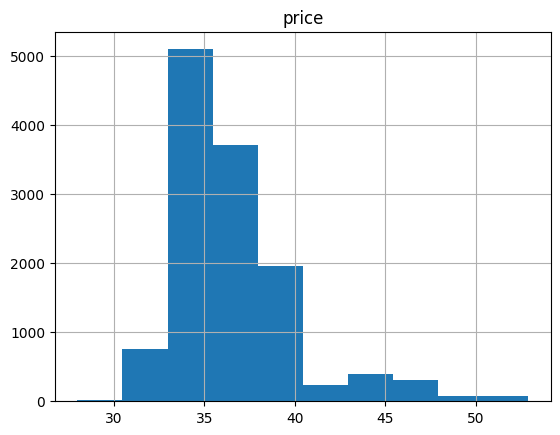

In [15]:

df2 = df[df['item_code']==minyak_masak_5kg_arr[0]]
print(df2.info)

df2.hist(column="price")


print(f'Median price of minyak masak 5kg is {df2["price"].median()}')

<bound method DataFrame.info of               date  premise_code  item_code  price
199     2023-06-01             3        260  35.49
200     2023-06-01             3        263  29.99
365     2023-06-01             6        260  37.90
366     2023-06-01             6        266  30.90
437     2023-06-01             6       1939  30.90
...            ...           ...        ...    ...
2414621 2023-06-30         20883        257  37.00
2414622 2023-06-30         20883        260  34.29
2414623 2023-06-30         20883        263  30.29
2414624 2023-06-30         20883        266  30.20
2414674 2023-06-30         20883       1939  28.99

[105271 rows x 4 columns]>
The Median price of minyak masak is 30.9


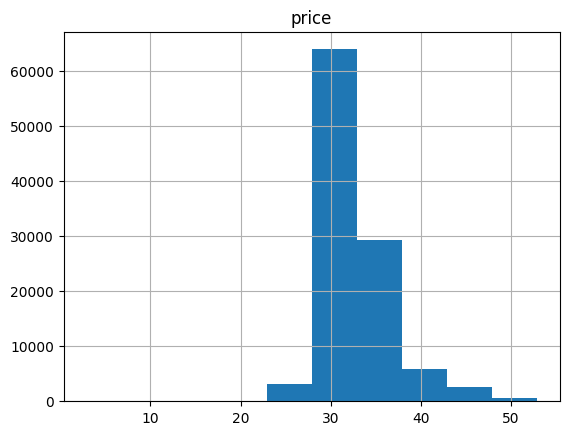

In [16]:
#b = df.loc[(df['item_code']==254) and (df['item_code']==257) ,['date','item_code','price']]
#[254, 257, 260, 263, 266, 1095, 1936, 1939, 1942]

b = df.query('item_code==254 or item_code==257 or item_code==260 or item_code==263 or item_code==266 or item_code==1095 or item_code==1936 or item_code==1939 or item_code==1942')

print(b.info)

b.hist(column='price')
print(f'The Median price of minyak masak is {b["price"].median()}')